# Reading netCDF Data

In [1]:
#Open file with Dataset
from netCDF4 import Dataset

ds1 = Dataset('D:/Projects/file.nc')
ds1

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: FERRET V6.65   23-Jun-20
    Conventions: CF-1.0
    dimensions(sizes): LON(144), LAT(72), TIME(8034), bnds(2)
    variables(dimensions): float64 LON(LON), float64 LAT(LAT), float64 TIME(TIME), float64 TIME_bnds(TIME, bnds), float32 PREC(TIME, LAT, LON)
    groups: 

In [2]:
#Set variables
prec = ds1.variables['PREC'][:]#(TIME SIZE=8034, LAT SIZE=72, LON SIZE=144)
lat = ds1.variables['LAT'][:]#LAT SIZE = 72
lon = ds1.variables['LON'][:]#LON SIZE = 144
time = ds1.variables['TIME'][:]#TIME SIZE = 8034  Also, Note that the dataset starts on Jan 01, 1998

In [3]:
#Print variables
#prec
lat
#lon
#time

masked_array(data=[-88.75, -86.25, -83.75, -81.25, -78.75, -76.25, -73.75,
                   -71.25, -68.75, -66.25, -63.75, -61.25, -58.75, -56.25,
                   -53.75, -51.25, -48.75, -46.25, -43.75, -41.25, -38.75,
                   -36.25, -33.75, -31.25, -28.75, -26.25, -23.75, -21.25,
                   -18.75, -16.25, -13.75, -11.25,  -8.75,  -6.25,  -3.75,
                    -1.25,   1.25,   3.75,   6.25,   8.75,  11.25,  13.75,
                    16.25,  18.75,  21.25,  23.75,  26.25,  28.75,  31.25,
                    33.75,  36.25,  38.75,  41.25,  43.75,  46.25,  48.75,
                    51.25,  53.75,  56.25,  58.75,  61.25,  63.75,  66.25,
                    68.75,  71.25,  73.75,  76.25,  78.75,  81.25,  83.75,
                    86.25,  88.75],
             mask=False,
       fill_value=1e+20)

# Extracting netCDF Data

In [6]:
#Open file with xarray
import xarray as xr

ds2 = xr.open_dataset('D:/Projects/file.nc')
ds2

<xarray.Dataset>
Dimensions:    (LAT: 72, LON: 144, TIME: 8034, bnds: 2)
Coordinates:
  * LON        (LON) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * LAT        (LAT) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * TIME       (TIME) float64 1.998e+07 1.998e+07 ... 2.019e+07 2.019e+07
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds  (TIME, bnds) float64 ...
    PREC       (TIME, LAT, LON) float32 ...
Attributes:
    history:      FERRET V6.65   23-Jun-20
    Conventions:  CF-1.0

In [7]:
#Convert Dataset to pandas DataFrame
#df = ds2.to_dataframe()

In [8]:
#Convert DataArray to pandas Series
# ds2['TIME_bnds'].to_series()

In [9]:
#Print data to csv format using DataFrame
time_range = np.arange(0,1)
#ds2.PREC[time_range].to_dataframe()
#ds2.PREC[time_range].to_dataframe().to_csv('D:/Projects/csv/prec.csv')

# Plotting netCDF Data

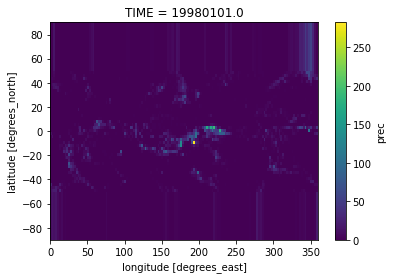

In [12]:
#Plot PREC at specific TIME
import matplotlib.pyplot as plt
import matplotlib as mpl

ds2.PREC[0].plot()

In [13]:
#Plot PREC on a map
import cartopy.crs as ccrs
import cartopy.feature as cft

days1 = np.arange(0,1)#Set range of days 
# for i in days1:
#     plt.figure(figsize=(20,5))#Set figure size
#     ax1 = plt.axes(projection=ccrs.Mollweide())#Set projection type
#     ds2.PREC[i].plot(ax=ax1, transform=ccrs.PlateCarree(), add_colorbar=False)#Plot PREC at i TIME
#     #Add map features
#     ax1.coastlines()
#     ax1.add_feature(cft.BORDERS)
#     ax1.add_feature(cft.STATES)
#     #Save the figure
#     plt.savefig(f'D:/Projects/mapstest/{i+1}.jpg')
#     plt.pause(1)

In [15]:
#Create timelapse gif
import PIL

image_frames = []
days3 = np.arange(1,2)
# for k in days3:
#     new_frame = PIL.Image.open(f'D:/Projects/mapstest/{k}.jpg') 
#     image_frames.append(new_frame)
# #Save as GIF
# image_frames[0].save('D:/Projects/timelapse/timelapse.gif', format='GIF', append_images = image_frames[1: ], save_all = True, duration = 100, loop = 0)